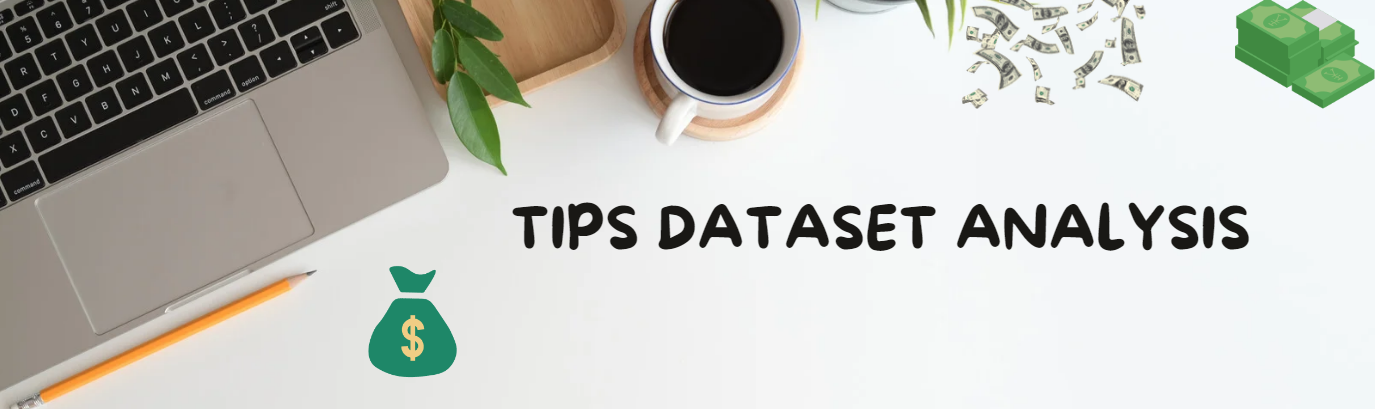

# Data Analysis Agenda

- <span style="color: #2c3e50; font-weight: bold;">* Import all the required libraries</span>
- <span style="color: #3498db; font-weight: bold;">* Load the tips dataset from the seaborn library</span>
- <span style="color: #e67e22; font-weight: bold;">* Store it in <code>df</code> variable and do the basic analysis like shape, info, describe, etc.</span>
- <span style="color: #e74c3c; font-weight: bold;">* Check if there are any null values</span>
- <span style="color: #2ecc71; font-weight: bold;">* Do the necessary treatment like <code>fillna</code>, <code>dropna</code></span>
- <span style="color: #9b59b6; font-weight: bold;">* Find the outliers and store the df with outliers in a separate variable (IQR method)</span>
- <span style="color: #f39c12; font-weight: bold;">* Visualization part: (matplotlib and seaborn)</span>
- <span style="color: #1abc9c; font-weight: bold;">* Do univariate analysis</span>
- <span style="color: #d35400; font-weight: bold;">* Do bivariate analysis</span>
- <span style="color: #c0392b; font-weight: bold;">* Do multivariate analysis</span>
- <span style="color: #34495e; font-weight: bold;">* Give business insights</span>

## **Import Required Libraries**

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## **load the tips dataset from the seaborn library**

In [101]:
df=sns.load_dataset("tips")

## Store it in df variable and so the basic analysis like shape, info, describe, etc.

In [103]:
df.shape

(244, 7)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [105]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [106]:
df.describe(exclude=object)

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## check if there are any null values

## do the necessary treatment like fillna, dropna

In [109]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Since there are no null values, there is no necessity for treatment

In [111]:
num=df.select_dtypes(include="number").columns
cat=df.select_dtypes(exclude="number").columns
print(cat)
print(num)

Index(['sex', 'smoker', 'day', 'time'], dtype='object')
Index(['total_bill', 'tip', 'size'], dtype='object')


## find the outliers and store the df with outliers in a separate variable(iqr method)

In [113]:
# iqr
q1=df[num].quantile(0.25)
q3=df[num].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
iqr

lower=q1-1.5*iqr
upper=q3+1.5*iqr
print(upper)
print(lower)

total_bill    13.3475
tip            2.0000
size           2.0000
Name: 0.25, dtype: float64
total_bill    24.1275
tip            3.5625
size           3.0000
Name: 0.75, dtype: float64
total_bill    40.29750
tip            5.90625
size           4.50000
dtype: float64
total_bill   -2.82250
tip          -0.34375
size          0.50000
dtype: float64


In [114]:
outliers=df[((df[num]>upper)|(df[num]<lower)).any(axis=1)]
no_outliers=df[~((df[num]>upper)|(df[num]<lower)).any(axis=1)]

In [115]:
#df[['total_bill', 'tip', 'size']]
#df[num]

In [116]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# **Univariate Analysis**

## Numerical or Continuous Variable Analysis

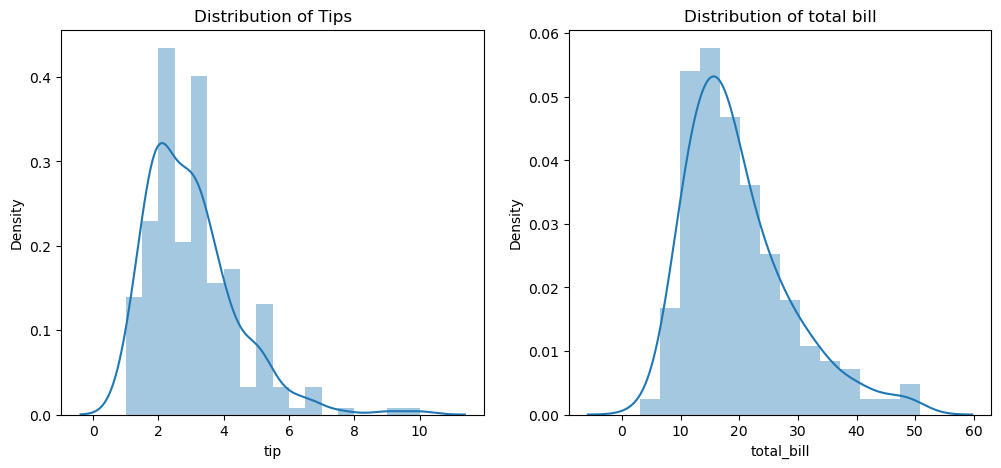

In [119]:
f,ax=plt.subplots(1,2,figsize = (12,5))
sns.distplot(df['tip'],ax=ax[0])
sns.distplot(df['total_bill'],ax=ax[1])
ax[0].set_title("Distribution of Tips")
ax[1].set_title("Distribution of total bill")
plt.show()

### **Insights**
- Tip is right skewed indicating that some customers has given more tips
- Total bill is right skewed which indicates the existence of high bill amount.

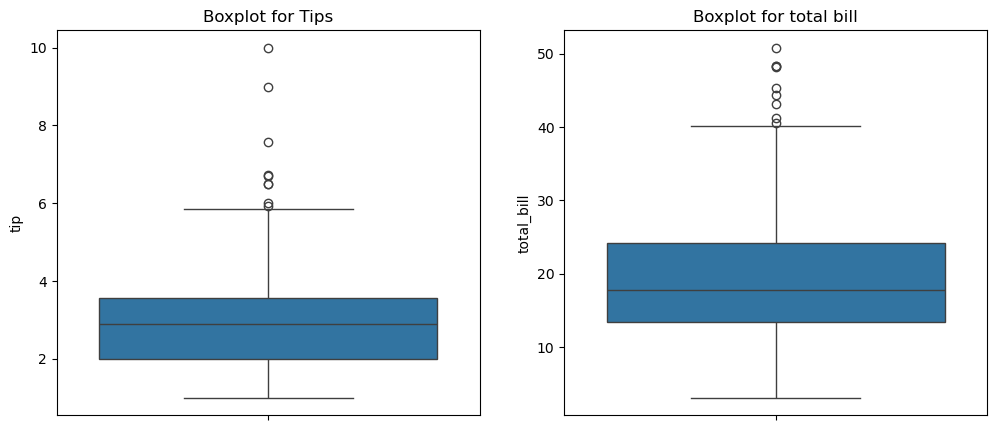

In [121]:
f,ax=plt.subplots(1,2,figsize = (12,5))
sns.boxplot(df['tip'],ax=ax[0])
sns.boxplot(df['total_bill'],ax=ax[1])
ax[0].set_title("Boxplot for Tips")
ax[1].set_title("Boxplot for total bill")
plt.show()

### **Insights**
- Tip column has outliers.
- Total bill also has outliers.

In [123]:
print(f"The skewness of Tips Column is {round(df['tip'].skew(),2)}")
print("Hence, the Tips column is right skewed or positively skewed")
print("-"*80)
print(f"The skewness of Total Bill Column is {round(df["total_bill"].skew(),2)}")
print("Hence, the total bill column is also positively skewed or right skewed")

The skewness of Tips Column is 1.47
Hence, the Tips column is right skewed or positively skewed
--------------------------------------------------------------------------------
The skewness of Total Bill Column is 1.13
Hence, the total bill column is also positively skewed or right skewed


In [124]:
print(f"The kurtosis of Tips Column is {round(df['tip'].kurt(),2)}")
print("Hence, the Tips column is leptokurtic")
print("-"*80)
print(f"The kurtosis of Total Bill Column is {round(df["total_bill"].kurt(),2)}")
print("Hence, the total bill column is also leptokurtic")

The kurtosis of Tips Column is 3.65
Hence, the Tips column is leptokurtic
--------------------------------------------------------------------------------
The kurtosis of Total Bill Column is 1.22
Hence, the total bill column is also leptokurtic


## Categorical/Discrete Variable Analysis

In [226]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [127]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

## Pie chart

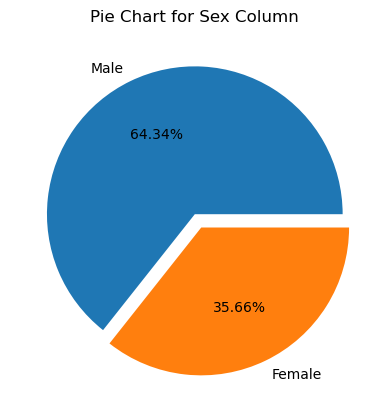

In [128]:
plt.pie(df['sex'].value_counts(),autopct="%.2f%%", labels= df['sex'].value_counts().index, explode=[0, 0.1])
plt.title("Pie Chart for Sex Column")
plt.show()

### **Insights**
- Most of the customers are male.
- Female proportion is less compared to male

## Bar chart(multiple)

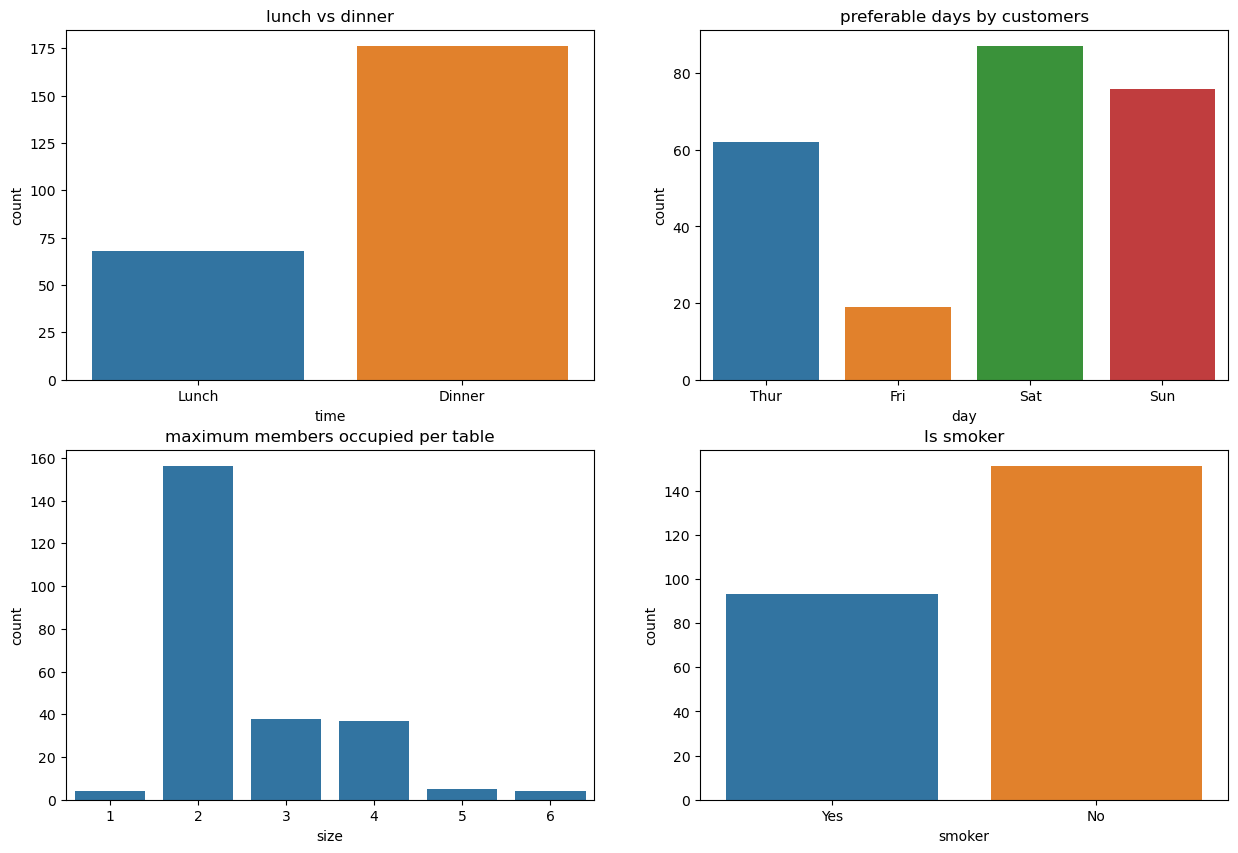

In [130]:
f, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(x = df['time'], hue = df.time, ax = ax[0,0])
ax[0,0].set_title("lunch vs dinner")
sns.countplot(x = df['day'], hue = df.day, ax = ax[0,1])
ax[0,1].set_title("preferable days by customers")
sns.countplot(x = df['size'], ax = ax[1,0])
ax[1,0].set_title("maximum members occupied per table")
sns.countplot(x = df['smoker'],hue=df.smoker,  ax = ax[1,1])
ax[1,1].set_title("Is smoker")
plt.show()

## **Insights**
- In lunch vs dinner diagram most customer prefer dinner
- Mostly, In saturday's and sunday's, there are more customers in the restaurant
- mostly we can see that they are couples in the restaurant
- Comparatively, most customers are non-smokers, but there is also an decent count of smoker customers

# **Bi variate Analysis**

## Numerical vs Numerical Variables

## Scatter plot

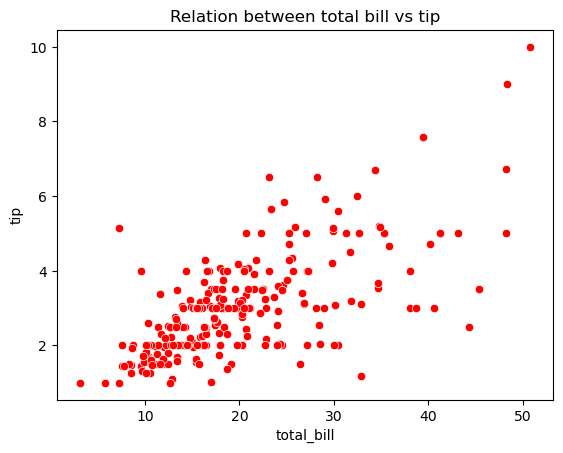

In [134]:
sns.scatterplot(x = df['total_bill'], y = df['tip'], color='r')
plt.title("Relation between total bill vs tip")
plt.show()

## Insights
* As the bill increases the tip given by customers also increases
* There is a positive correlation between total bill and tip given by customers
* Majority of the customer's bill amounts between 10 to 30.
* One customer who's bill amount is 50 has given the highest tip

In [136]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


## Count plot

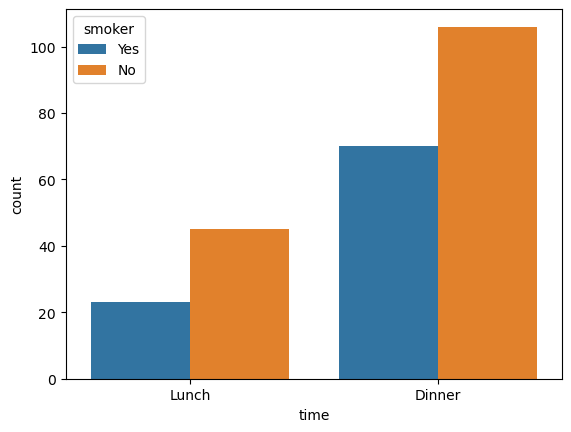

In [137]:
sns.countplot(x=df["time"],hue=df['smoker'])
plt.show()

## Insights
**as we can see most of the people prefered to smoke in dinner time**


## Violin plot

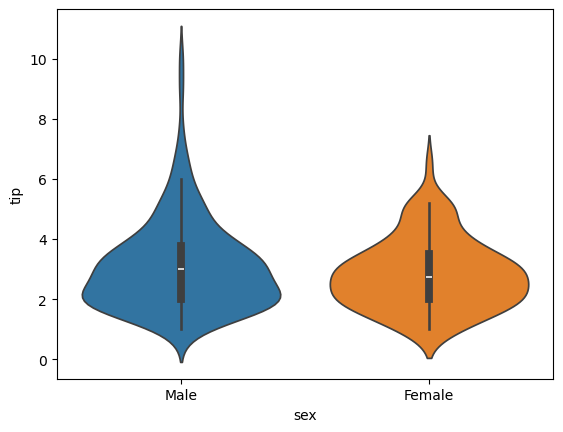

In [140]:
sns.violinplot(x=df['sex'],y=df['tip'],hue=df.sex)
plt.show()

### Insights
* we can see that most of the male gave more tips
* And it ranges around 2 to 4
* in female plot they contributed less money

## Swarm plot

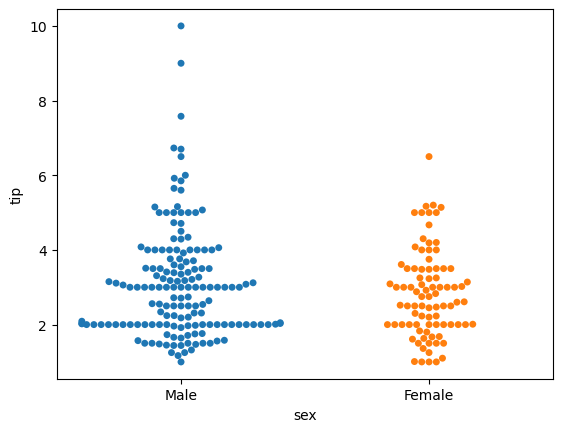

In [143]:
sns.swarmplot(x=df['sex'],y=df['tip'],hue=df.sex)
plt.show()

### Insights
* male contributed more tips
* whereas female contributed less tips 

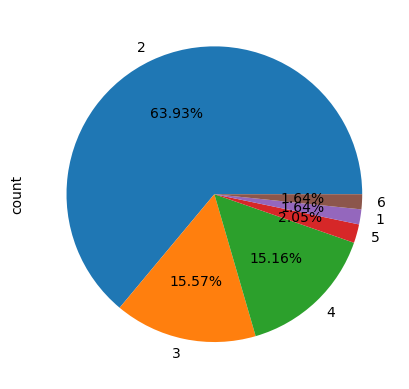

In [145]:
df['size'].value_counts().plot(kind="pie",autopct="%.2f%%")
plt.show()

In [146]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Multivarite Analysis
**Heatmap**

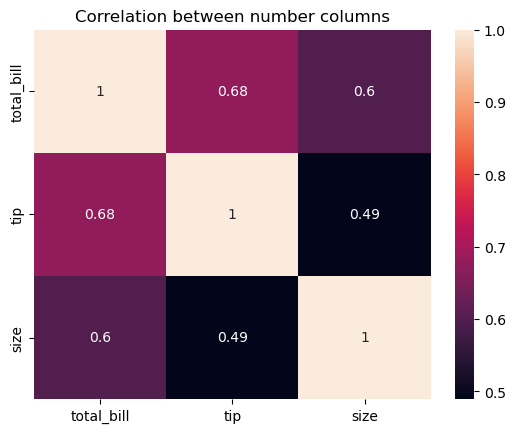

In [148]:
sns.heatmap(df.select_dtypes(include="number").corr(),annot=True)
plt.title("Correlation between number columns")
plt.show()

## Insights
* There is a positive correlation between the tip and the total bill, Hence, when the bill amount increases the tip amount also increases 
* There is a decent correlation between size and tip

**Crosstab**

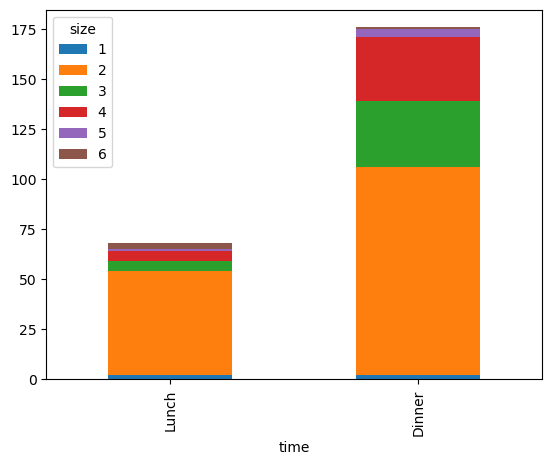

In [241]:
pd.crosstab(df['time'],df['size']).plot(kind="bar",stacked=True)
plt.show()

## Insights
* size 3 and 4 are similar
* Number two is the High number of size shown

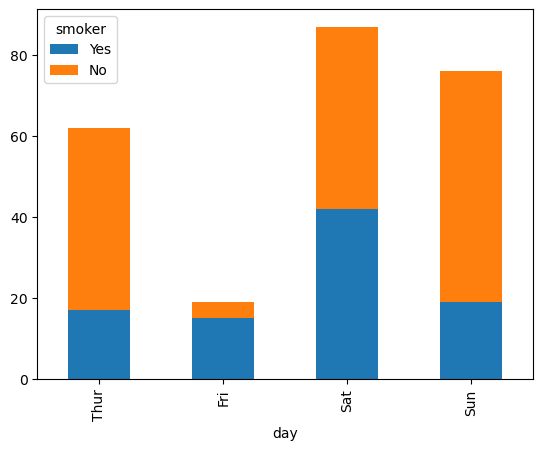

In [243]:
pd.crosstab(df['day'],df['smoker']).plot(kind="bar",stacked=True)
plt.show()

## Insights
* On Friday the amount of smokers is less
* Thursday and Friday is the average amount of snooker experienced some peace

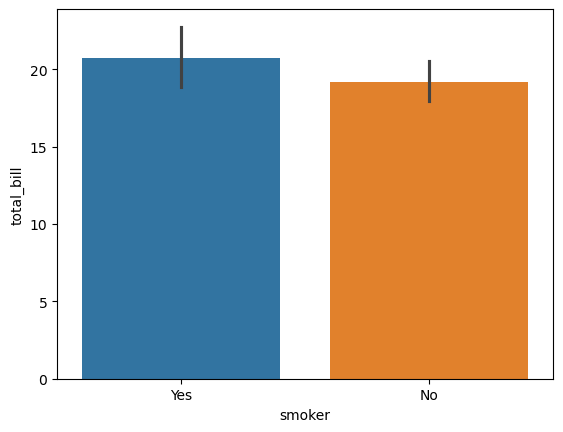

In [250]:
sns.barplot(x=df['smoker'],y=df['total_bill'],hue=df.smoker)
plt.show()

# Pair plot

In [157]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [209]:
len(tips['day'].unique())

4

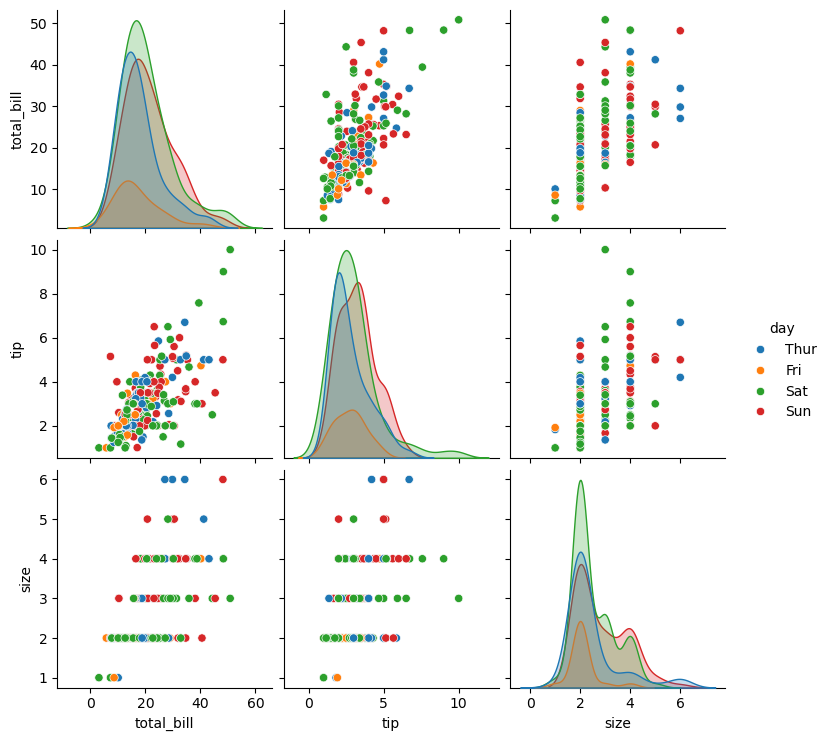

In [254]:
sns.pairplot(df, hue='day')
plt.show()

## Insights
* Saturdays are the most common in the chart
* its consists of numberical chats

**Facetgrid**

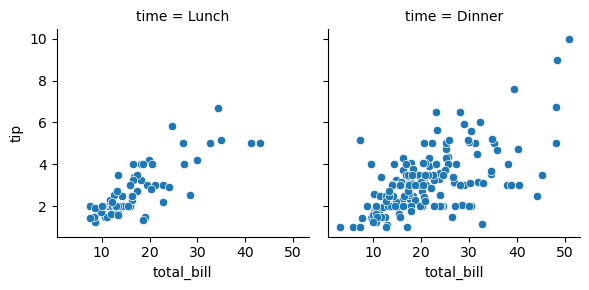

In [216]:
g = sns.FacetGrid(tips, col='time')
g.map(sns.scatterplot, 'total_bill', 'tip')
plt.show()

## Insights
* Dinner is the preferable time when people eat in the restaurant
* Lunch is not the favorite time preferrable by the customers

## Regression plot

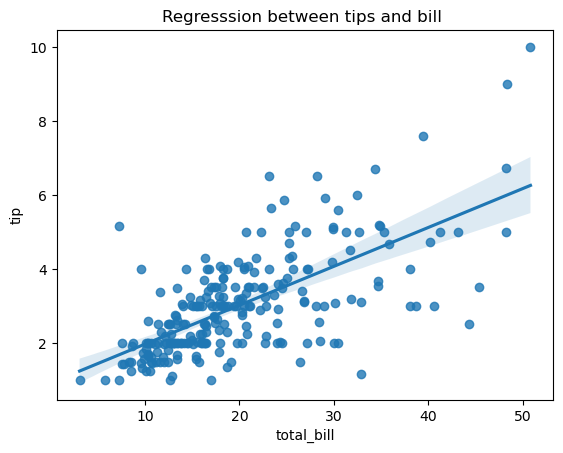

In [222]:
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title("Regresssion between tips and bill ")
plt.show()

### Insights
* it shows scatter plot
* best-fit trend through the data points is normal
* Confidence Interval of the trend line is normal